In [1]:
import os
import sys
import argparse
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

pathdata = '~/.datasets'
namedataset = 'affectnet'
fileimage = 'Manually_Annotated/Manually_Annotated_Images'
filemetadata = 'training.csv' #'training.csv'


pathdata = os.path.expanduser( pathdata )
pathnamedataset = os.path.join( pathdata, namedataset )
pathfilemetadata = os.path.join( pathnamedataset, filemetadata )
pathfileimages = os.path.join( pathnamedataset, fileimage )

print(pathfilemetadata)
print(pathfileimages)


/home/fernandez/.datasets/affectnet/training.csv
/home/fernandez/.datasets/affectnet/Manually_Annotated/Manually_Annotated_Images


In [3]:
data = pd.read_csv( pathfilemetadata )
data.head()

,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal
0,689/737db2483489148d783ef278f43f486c0a97e140fc...,134.0,134.0,899,899,181.64;530.91;188.32;627.82;195.1;723.37;205.2...,1,0.785714,-0.055556
1,392/c4db2f9b7e4b422d14b6e038f0cdc3ecee239b5532...,20.0,20.0,137,137,28.82;77.52;29.12;93.25;31.04;108.51;33.03;123...,0,-0.017253,0.004313
2,468/21772b68dc8c2a11678c8739eca33adb6ccc658600...,11.0,11.0,176,176,30.52;87.33;32.55;106.43;36.94;125.81;43.06;14...,0,0.174603,0.007937
3,944/06e9ae8d3b240eb68fa60534783eacafce2def60a8...,40.0,40.0,269,269,44.43;158.17;47.08;189.2;50.54;221.88;58.3;253...,1,0.153401,0.038890
4,993/02e06ee5521958b4042dd73abb444220609d96f57b...,22.0,22.0,153,153,50.59;78.72;48.6;93.23;48.72;109.06;48.8;123.0...,8,0.783972,-0.551684


['Neutral' 'Happy' 'Surprise' 'Sad' 'Anger' 'Disgust' 'Fear' 'Contempt'
 'None' 'Uncertain' 'Non-Face']
11


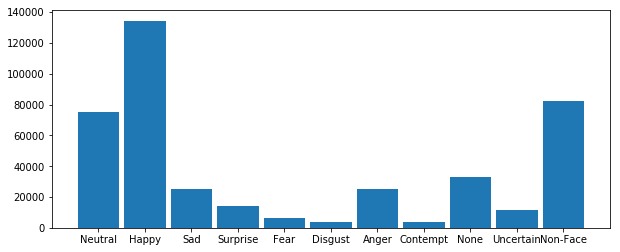

In [4]:
#emotion_name = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'None', 'Uncertain', 'Non-Face' ]
emotion_name = ['Neutral',  'Happy',     'Sad',      'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt', 'None', 'Uncertain', 'Non-Face' ]
emo2ck = [0,1,3,2,6,5,4,7,8,9,10]
print( np.array(emotion_name)[ np.array(emo2ck) ]  )

labels = [d for d in data['expression'] ] 

# Count frequency of each label
labels, counts = np.unique(labels, return_counts=True)
print(len(counts))

# Plot the histogram
plt.rcParams["figure.figsize"] = [10, 4]
axes = plt.gca()
axes.set_xlim([-1,11])

plt.bar(labels, counts,  tick_label=emotion_name, width=0.9, align='center')
#plt.title('Class Distribution across Training Data')
plt.show()

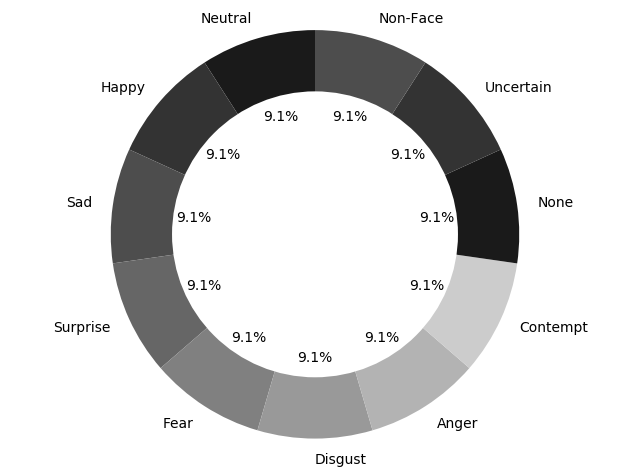

In [6]:
plt.style.use('default')

emotion_name = ['Neutral',  'Happy',     'Sad',      'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt', 'None', 'Uncertain', 'Non-Face' ]
colors =  np.array(['#1A1A1A','#333333','#4D4D4D','#666666', '#808080', '#999999', '#B3B3B3', '#CCCCCC']) #'#E6E6E6'
indx = np.array([0,7,1,2,5,3,4,6], dtype=np.int)

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=emotion_name, autopct='%1.1f%%', startangle=90, colors = colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
# plt.savefig('../out/ferp_frec.eps')
plt.show()

In [7]:
emotion_name = ['Neutral',  'Happy',     'Sad',      'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt' ]
print(data.shape)
data_exp = data[ [ exp in [0,1,2,3,4,5,6,7] for exp in data['expression']  ] ]
print(data_exp.shape )

(5500, 9)
(4000, 9)


['Neutral' 'Happy' 'Surprise' 'Sad' 'Anger' 'Disgust' 'Fear' 'Contempt']
8


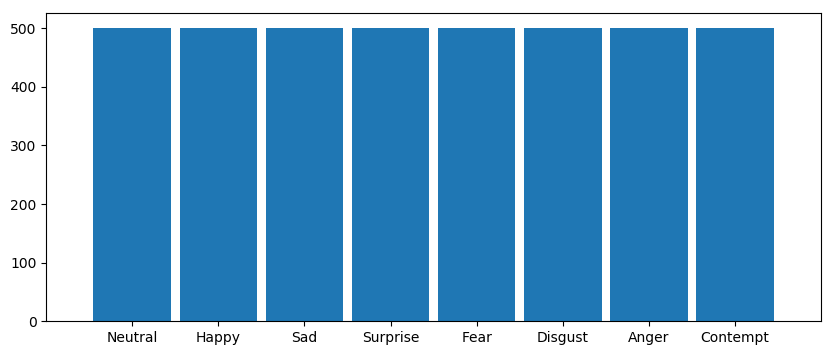

In [8]:
#emotion_name = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt' ]
emotion_name = ['Neutral',  'Happy',     'Sad',      'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']
emo2ck = [0,1,3,2,6,5,4,7]
print( np.array(emotion_name)[ np.array(emo2ck) ]  )

labels = [d for d in data_exp['expression'] ] 

# Count frequency of each label
labels, counts = np.unique(labels, return_counts=True)
print(len(counts))

# Plot the histogram
plt.rcParams["figure.figsize"] = [10, 4]
axes = plt.gca()
axes.set_xlim([-1,8])

plt.bar(labels, counts,  tick_label=emotion_name, width=0.9, align='center')
#plt.title('Class Distribution across Training Data')
plt.show()

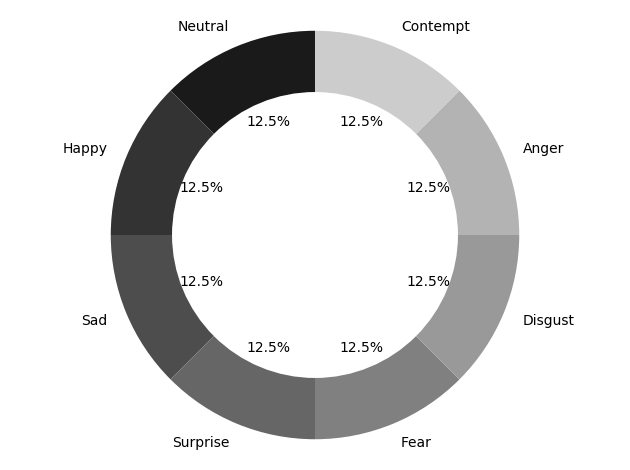

In [9]:
plt.style.use('default')

emotion_name = ['Neutral',  'Happy',     'Sad',      'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt' ]
colors =  np.array(['#1A1A1A','#333333','#4D4D4D','#666666', '#808080', '#999999', '#B3B3B3', '#CCCCCC']) #'#E6E6E6'
indx = np.array([0,7,1,2,5,3,4,6], dtype=np.int)

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=emotion_name, autopct='%1.1f%%', startangle=90, colors = colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
# plt.savefig('../out/ferp_frec.eps')
plt.show()

/home/fernandez/.datasets/affectnet/Manually_Annotated/Manually_Annotated_Images/459/81456263be241927c7a59a2646f88c2700ce4b7cba6094570ec2b10c.jpg
(1275, 1275, 3)


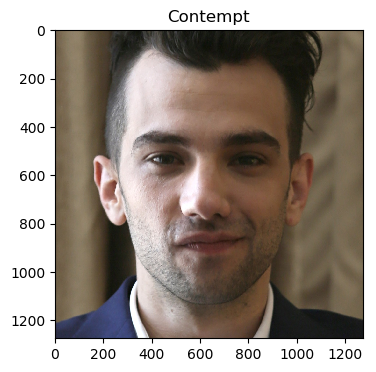

In [10]:


indx = 0
emotion_name = ['Neutral',  'Happy',     'Sad',      'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt', 'None', 'Uncertain', 'Non-Face' ]
nameimage, label = data['subDirectory_filePath'][ indx ], data['expression'][ indx ]

pathimage = os.path.join( pathfileimages, nameimage )
print(pathimage)

image = cv2.imread( pathimage )[:,:,(2,1,0)]
print(image.shape)

plt.figure( figsize=(4,4) )
plt.imshow( image )
plt.title( emotion_name[label] )
plt.show()


In [11]:

index = []
for i in tqdm(range(len(data))): 
    nameimage, label = data['subDirectory_filePath'][ i ], data['expression'][ i ]
    pathimage = os.path.join( pathfileimages, nameimage )
    try:
        image = cv2.imread( pathimage )[:,:,(2,1,0)]
    except:
        print(i, pathimage)
        index.append(i)
    


100%|██████████| 5500/5500 [01:25<00:00, 64.18it/s]


In [ ]:
# 235929, 315313, ...

In [6]:
i=315313
nameimage, label = data['subDirectory_filePath'][ i ], data['expression'][ i ]
pathimage = os.path.join( pathfileimages, nameimage )
image = cv2.imread( pathimage )[:,:,(2,1,0)]


TypeError: 'NoneType' object is not subscriptable

In [3]:

train = 'train'
validation = 'train'
test  = 'train'

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from pytvision.datasets.imageutl import dataProvide

def make_dataset( path, metadata ):
    '''load file patch for disk
    '''
    
    print( os.path.join( path, metadata))
    data = pd.read_csv( os.path.join( path, metadata) )   
    # filter dataset for only expression and valid image data
    #data = data[ [ exp in [0,1,2,3,4,5,6,7] for i,exp in enumerate(data['expression']) if (i != 235929 or i != 315313) ]   ] 
    ifilter = np.array([ exp in [0,1,2,3,4,5,6,7] for i,exp in enumerate( data['expression'] )  ])        
    ifilter[ np.array([235929, 315313])  ] = False
    ifilter = np.where( ifilter == True )[0]
    
    return data, ifilter


class AffectNetProvide( dataProvide ):
    '''Provide for AffectNet dataset
    
    Format
    subDirectory_filePath;face_x;face_y;face_width;face_height;facial_landmarks;expression;valence;arousal
    '''
            
    classes = ['Neutral - NE', 'Happiness - HA', 'Surprise - SU', 'Sadness - SA', 'Anger - AN', 'Disgust - DI', 'Fear - FR', 'Contempt - CO']
    class_to_idx = {_class: i for i, _class in enumerate(classes)}
    emo2ck = [0,1,3,2,6,5,4,7]
    
    @classmethod
    def create(
        cls, 
        path,
        train=True,
        folders_images='train',
        metadata='train.csv',
        ):
        '''
        Factory function that create an instance of ATLASProvide and load the data form disk.
        '''
        provide = cls(path, train, folders_images, metadata )
        return provide
    
    def __init__(self,
        path,        
        train=True,
        folders_images='train',
        metadata='train.csv',
        ):
        super(AffectNetProvide, self).__init__( )        
        self.path            = os.path.expanduser( path )
        self.folders_images  = folders_images
        self.metadata        = metadata
        self.data            = []
        self.train           = train
        
        self.data, self.indexs = make_dataset( self.path, self.metadata  )
        self.labels = [ self.emo2ck[ self.data['expression'][ self.indexs[i] ] ] for i in range(len(self.indexs))  ]
        self.classes = np.unique( self.labels )
        self.numclass = len(self.classes)
        
                
    def __len__(self):
        return len(self.indexs)

    def __getitem__(self, i):          
        #check index
        if i<0 and i>len(self.indexs): raise ValueError('Index outside range')
        i = self.indexs[i]
        self.index = i              
        pathimagefile = self.data['subDirectory_filePath'][i]
        label = self.labels[i]        
        image = np.array(self._loadimage( os.path.join(self.path, self.folders_images, pathimagefile ) ), dtype=np.uint8 )
        return image, label

    def getlandamarks(self):
        i = self.index
        return np.array([  float(x)   for x in self.data['facial_landmarks'][i].split(';') ]).reshape( -1, 2 )

    def bbox(self):
        i = self.index
        return (
            self.data['face_x'][i], 
            self.data['face_y'][i],
            self.data['face_width'][i],
            self.data['face_height'][i]
            )
    
    
def test():

    path = "~/.datasets/"
    namedataset = 'affectnet'
    metadata='training.csv' # train.csv, sample_submission.csv
    folders_images='Manually_Annotated/Manually_Annotated_Images'  
    train=True #True, False
    
    pathname = os.path.join( path,  namedataset )
    dataset = AffectNetProvide.create(path=pathname, train=train, folders_images=folders_images, metadata=metadata )
    image, label = dataset[1]

    print( len(dataset) )     
    print( label )

    plt.figure( figsize=(8,8) )
    plt.imshow( image )
    plt.axis('off')
    plt.show()

# test()

/home/fernandez/.datasets/affectnet/training.csv
287651
0


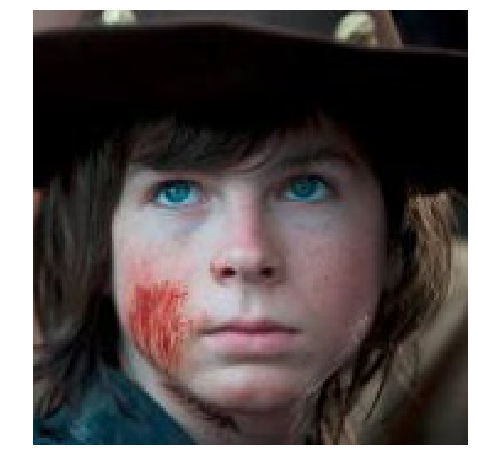

In [8]:

path = "~/.datasets/"
namedataset = 'affectnet'
metadata='training.csv' # train.csv, sample_submission.csv
folders_images='Manually_Annotated/Manually_Annotated_Images'  
train=True #True, False

pathname = os.path.join( path,  namedataset )
dataset = AffectNetProvide.create(path=pathname, train=train, folders_images=folders_images, metadata=metadata )
image, label = dataset[1]

print( len(dataset) )     
print( label )

plt.figure( figsize=(8,8) )
plt.imshow( image )
plt.axis('off')
plt.show()



(128, 128, 3)
(128, 128, 3)
(128, 128)
0.0 214.66666666666666


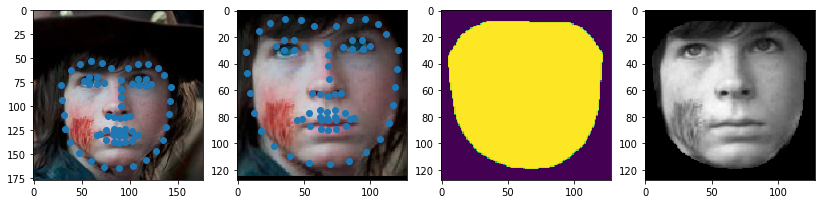

In [16]:

import math
from pytvision.transforms import functional as F

def getmask( x, p ):
    mask = np.zeros( x.shape[:2] )
    p = [  [[int(e[0]),int(e[1]) ]]  for e in p ]
    hull = cv2.convexHull( np.array(p),  False  )
    cv2.fillPoly(mask, [hull], 1)   
    return mask

def param2theta(mat_r, w, h):
    H = np.concatenate( (mat_r,[[0,0,1]]),axis=0 )      
    param = H #np.linalg.inv(H)
    theta = np.zeros([2,3])
    theta[0,0] = param[0,0]
    theta[0,1] = param[0,1]*h/w
    theta[0,2] = param[0,2]*2/w + param[0,0] + param[0,1] - 1
    theta[1,0] = param[1,0]*w/h
    theta[1,1] = param[1,1]
    theta[1,2] = param[1,2]*2/h + param[1,0] + param[1,1] - 1
    return theta

def angle2mat( fi ):
    "To convert angle to rotation matrix"
    rx = fi[0]; ry = fi[1]; rz = fi[2];
    sx = np.sin(rx); cx = np.cos(rx)
    sy = np.sin(ry); cy = np.cos(ry)
    sz = np.sin(rz); cz = np.cos(rz)
    Rx = np.array([[ 1,   0,  0], [ 0, cx, -sx], [  0, sx, cx]])
    Ry = np.array([[cy,   0, sy], [ 0,  1,   0], [-sy,  0, cy]]) 
    Rz = np.array([[cz, -sz,  0], [sz, cz,   0], [  0,  0,  1]])
    return np.dot(Rz,np.dot(Ry,Rx))

def boundingbox(box):
    "Estimate boundingbox"
    xmin = np.min(box[:,0]); ymin = np.min(box[:,1])
    xmax = np.max(box[:,0]); ymax = np.max(box[:,1])
    bbox = np.array([[xmin, ymin],[xmax, ymax]])
    return bbox

def resize( image, height=128,  width=128, interpolate_mode=cv2.INTER_LANCZOS4 ):
    return F.resize_image(image, 
        height=height, width=width, 
        resize_mode='square', 
        padding_mode=cv2.BORDER_CONSTANT,
        interpolate_mode=interpolate_mode, 
        )

def adjust( image, plm  ):
    
    mu = plm.mean(axis=0)
    plm_c = plm - mu

    p1 = [ *plm_c[39,:], 1 ] 
    p2 = [ *plm_c[42,:], 1 ] 
    l = np.cross(p1, p2)
    th =  math.atan2( l[1]/l[2], l[0]/l[2] )

    #print(90 - th* 180 / math.pi)
    d = ( (p1[0] - p2[0] )**2 + (p1[1] - p2[1] )**2 ) ** 0.5
    #print(d*0.2)
    
    ang = 90 - th* 180 / math.pi
    imsize = image.shape     

    matR = cv2.getRotationMatrix2D( (imsize[1]//2, imsize[0]//2) , -ang ,1 ) 
    H = param2theta(matR, imsize[1], imsize[0]  )

    image_rot = cv2.warpAffine(image, matR, (imsize[1], imsize[0]))
    plm_rot = np.dot( H, np.concatenate((plm_c,np.ones([plm_c.shape[0],1])),axis=1).T )   
    plm_rot = plm_rot.T
    plm_rot = plm_rot + mu
    
    bbox = boundingbox( plm_rot )
    
    br = d*0.2
    bbox[0,0] = bbox[0,0] - br if bbox[0,0] - br > 0 else 0    
    bbox[0,1] = bbox[0,1] - br if bbox[0,1] - br > 0 else 0
    bbox[1,0] = bbox[1,0] + br if bbox[1,0] + br < imsize[0] else imsize[1]
    bbox[1,1] = bbox[1,1] + br if bbox[1,1] + br < imsize[1] else imsize[0]
        
        
    image_rot = image_rot[  int(bbox[0,1]):int(bbox[1,1]), int(bbox[0,0]):int(bbox[1,0]), : ]
    plm_rot[:,0] = plm_rot[:,0] - bbox[0,0]
    plm_rot[:,1] = plm_rot[:,1] - bbox[0,1]
    
    return image_rot, plm_rot
 
    

i = 1
image, label = dataset[ i ]
plm = np.array(dataset.getlandamarks()).reshape( -1, 2 )

image_rot, plm_rot = adjust( image, plm )
mask_rot = getmask( image_rot, plm_rot )

image_rot = resize( image_rot, height=128,  width=128, interpolate_mode=cv2.INTER_LANCZOS4 )
mask_rot  = resize( mask_rot , height=128,  width=128, interpolate_mode=cv2.INTER_LINEAR )[:,:,0]
image_mask = (image_rot.mean(axis=2) * mask_rot)


# image_mask = F.resize_image(image_mask, 
#              height=128, width=128, 
#              resize_mode='asp', 
#              padding_mode=cv2.BORDER_CONSTANT,
#              interpolate_mode=cv2.INTER_LANCZOS4, 
#              )


print(image_rot.shape)
print(image_rot.shape)
print(mask_rot.shape)
print(image_mask.min(), image_mask.max())

plt.figure( figsize=(14,8) )
plt.subplot(141)
plt.imshow( image )
plt.plot(plm[:,0],plm[:,1] ,'o')
plt.subplot(142)
plt.imshow( image_rot )
plt.plot(plm_rot[:,0],plm_rot[:,1] ,'o')
plt.subplot(143)
plt.imshow( mask_rot )
plt.subplot(144)
plt.imshow( image_mask, cmap='gray' )
plt.show()



In [ ]:
## Synthetic

In [2]:
sys.path.append('../')
from torchlib.datasets.fersynthetic  import SyntheticFaceDataset
from torchlib.datasets.factory  import FactoryDataset
from torchlib.datasets.affect import AffectNetProvide

0 212
287650
0


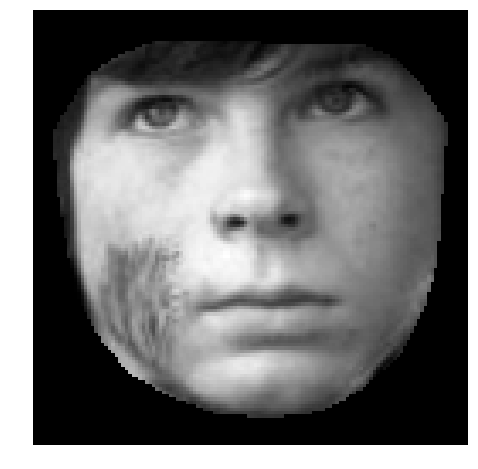

In [4]:
path = "~/.datasets/"
namedataset = 'affectnet'
metadata='training.csv' # train.csv, sample_submission.csv
folders_images='affectnetdarck'  #'Manually_Annotated/Manually_Annotated_Images'  
train=True #True, False

pathname = os.path.join( path,  namedataset )
data = AffectNetProvide.create(path=pathname, train=train, folders_images=folders_images, metadata=metadata, org=False )
image, label = data[1]


print( image.min(), image.max() )
print( len(data) )     
print( label )

plt.figure( figsize=(8,8) )
plt.imshow( image, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
pathnameback  = '~/.datasets/coco'

dataset = SyntheticFaceDataset(
    data,
    pathnameback,
    generate='image_and_mask',
    iluminate=True, angle=45, translation=0.2, warp=0.1, factor=0.2,
)

print( len(dataset) )


287650


In [6]:
def lincomb(im1,im2,mask,alpha=0.5):
    im = im1.copy()     
    row, col = np.where(mask != 0)
    for i in range( len(row) ):
        r,c = row[i],col[i]
        im[r,c,0] = im1[r,c,0]*(1-alpha) + im2[r,c,0]*(alpha)
        im[r,c,1] = im1[r,c,1]*(1-alpha) + im2[r,c,1]*(alpha)
        im[r,c,2] = im1[r,c,2]*(1-alpha) + im2[r,c,2]*(alpha)
    return im

def setcolor(im, mask, color):    
    tmp=im.copy()
    tmp=np.reshape( tmp, (-1, im.shape[2])  )   
    mask = np.reshape( mask, (-1,1))      
    tmp[ np.where(mask>0)[0] ,:] = color
    im=np.reshape( tmp, (im.shape)  )
    return im

def makecolormask( mask, color=[1,0,0] ):
    colormask = np.zeros( (mask.shape[0], mask.shape[1], 3) )    
    colormask = setcolor(colormask, mask, color )        
    return colormask

(148, 148, 3)
(148, 148, 2) 0.0 1.0
[ 9.16779613e-01 -7.13638084e-04 -2.79935196e-01  6.24858965e-02
  1.01784527e+00  1.42285830e-01]


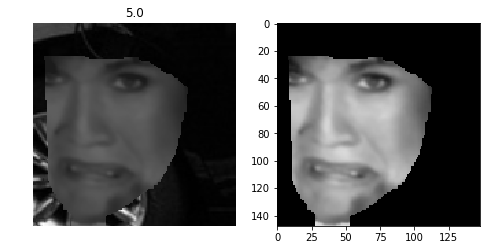

In [14]:

i = 50 #np.random.randint( len(dataset) )
image_org, image, mask, meta = dataset[ i ]   

label = meta[0]
theta = meta[1:]
#x_org, x_img, y_mask, y_lab

# print(idx)
print(image.shape)
print(mask.shape, mask.min(), mask.max() )
print(theta)

mask = mask[:,:,1]
colormask = makecolormask( mask, color=[1,0,0] )

plt.figure( figsize=(8,8) )
plt.subplot(121)
#plt.imshow( lincomb( image/255, colormask, mask, alpha=0.3 ) )
#plt.imshow(mask)
plt.imshow(image)
#plt.imshow(mask, cmap='seismic', alpha=0.2)
plt.title( label )
plt.axis('off')

plt.subplot(122)
plt.imshow(image_org)

plt.show()

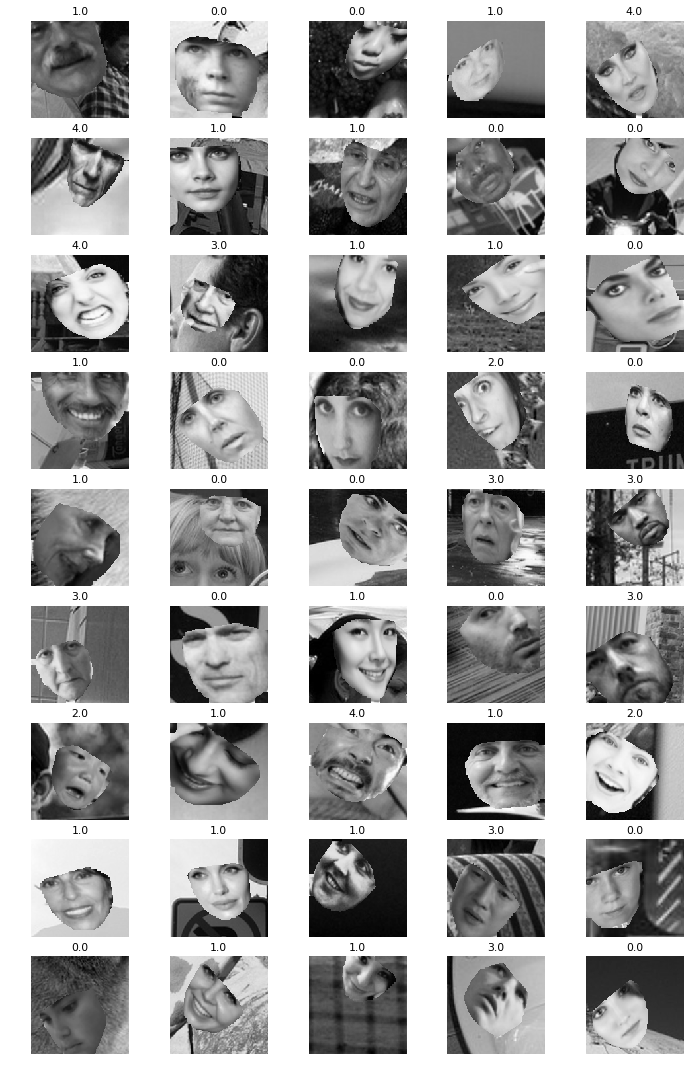

In [18]:
import matplotlib
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (12,19)

numRows = 9; numCols = 5

plt.figure()
for k in range(numRows*numCols):
    image_org, image, mask, label = dataset[ k  ]   #np.random.randint( len(dataset) )
    plt.subplot(numRows,numCols,k+1); 
    plt.imshow( image )
    #plt.imshow( mask[:,:,1], cmap='seismic', alpha=0.2)
    plt.title( label[0] ); 
    plt.axis('off')

## Pytorch Dataloader 

In [3]:
sys.path.append('../')
from torch.utils.data import Dataset, DataLoader
from aug import get_transforms_aug, get_transforms_det

In [4]:

imsize=64
pathnamedata = '~/.datasets'
pathnameback = '~/.datasets/coco'

data=FactoryDataset.factory(
    pathname=pathnamedata, 
    name=FactoryDataset.affectdark, 
    subset=FactoryDataset.validation, 
    download=True 
    )

dataset = SyntheticFaceDataset(
    data,
    pathnameback,
    generate='image_and_mask',
    iluminate=True, angle=45, translation=0.2, warp=0.2, factor=0.2,
    transform_data=get_transforms_aug( imsize ),
    transform_image=get_transforms_det( imsize ),
)

dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4 )
print( len(dataset) )

4000


torch.Size([4, 3, 64, 64]) torch.Size([4, 3, 64, 64]) torch.Size([4, 2, 64, 64]) torch.Size([4, 7])


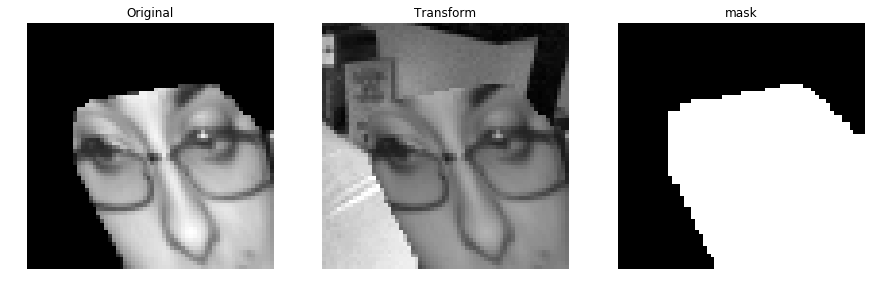

torch.Size([4, 3, 64, 64]) torch.Size([4, 3, 64, 64]) torch.Size([4, 2, 64, 64]) torch.Size([4, 7])


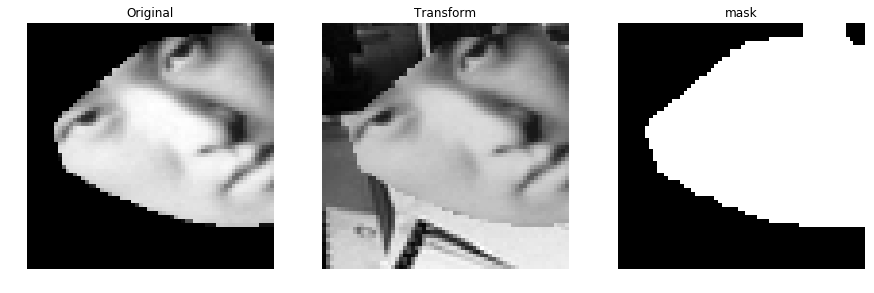

torch.Size([4, 3, 64, 64]) torch.Size([4, 3, 64, 64]) torch.Size([4, 2, 64, 64]) torch.Size([4, 7])


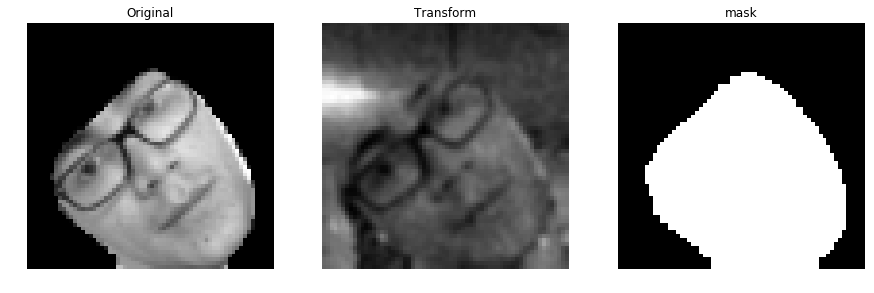

torch.Size([4, 3, 64, 64]) torch.Size([4, 3, 64, 64]) torch.Size([4, 2, 64, 64]) torch.Size([4, 7])


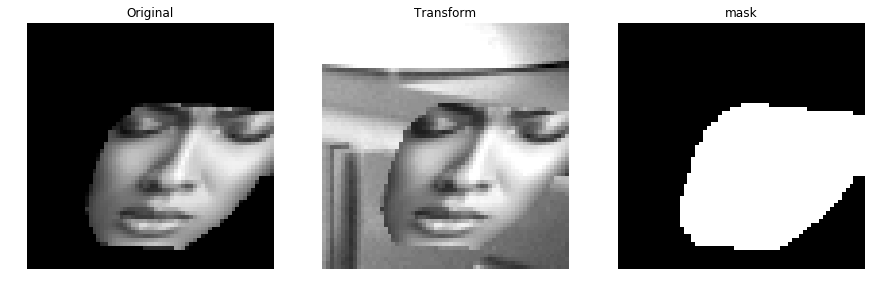

torch.Size([4, 3, 64, 64]) torch.Size([4, 3, 64, 64]) torch.Size([4, 2, 64, 64]) torch.Size([4, 7])


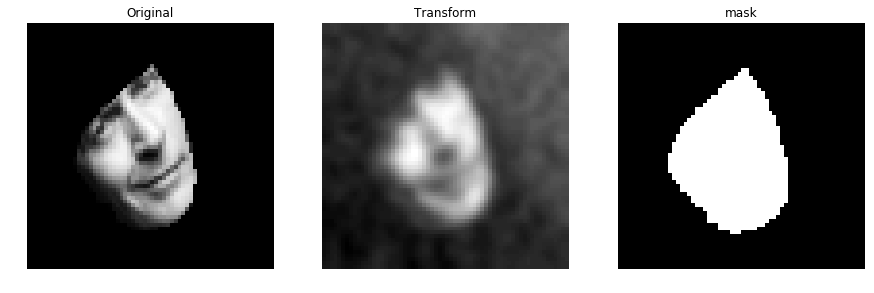

torch.Size([4, 3, 64, 64]) torch.Size([4, 3, 64, 64]) torch.Size([4, 2, 64, 64]) torch.Size([4, 7])


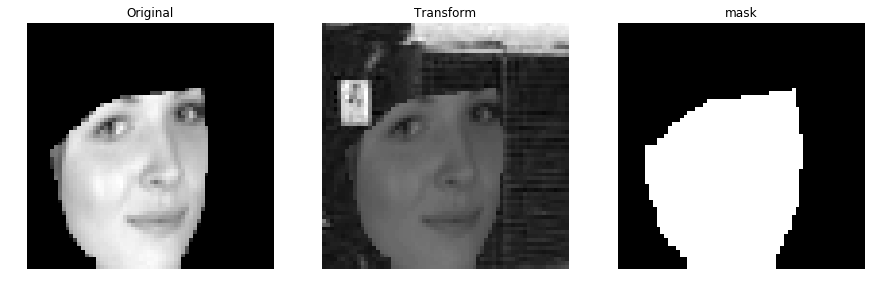

In [8]:
label_batched = []
for i_batch, (x_org, x_img, y_mask, meta ) in enumerate(dataloader):
    print(x_org.shape, x_img.shape, y_mask.shape, meta.shape)
    
    
    img_org = x_org[0,0,...]
    img_trf = x_img[0,0,...]
    mask    = y_mask[0,1,...]
    
    # observe 4th batch and stop.
     
        
    plt.figure( figsize=(15,15) )
    plt.subplot(131)
    plt.imshow(img_org,cmap='gray')
    plt.title('Original')
    plt.axis('off')
    plt.ioff()
    
    plt.subplot(132)
    plt.imshow(img_trf,cmap='gray')
    plt.title('Transform')
    plt.axis('off')
    plt.ioff()

    plt.subplot(133)
    plt.imshow(mask,cmap='gray')
    plt.title('mask')
    plt.axis('off')
    plt.ioff()        
    plt.show()   
        
    if i_batch == 5:
        break